<a href="https://colab.research.google.com/github/arielmeragelman/Practicas_profesionales_1/blob/main/Regresion_logistica_desbalanceado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from numpy.random import seed
import numpy as np
from numpy.random import normal,uniform
import pandas as pd
import random



seed(1)
# CONSTANTE PARA VARIAR LOS VALORES DE LA MATRIZ
parametro_controlado=100

#Genero valores distribuidos normalmente , en el caso de una de las matrices la media rondara por parametro_controlado
# y la otra matriz la media rondara parametro_controlado/2

a = normal(loc=0, scale=1, size=20)+(parametro_controlado/2)
b = normal(loc=0, scale=1, size=200)+parametro_controlado

a=a.round(0)
b=b.round(0)

#Genero valores distribuidos uniformemente , en el caso de una de las matrices la media rondara por parametro_controlado
# y la otra matriz la media rondara parametro_controlado/2

c = np.random.randint(low=parametro_controlado*0.42, high=parametro_controlado*0.53, size=20, dtype='l') 
d = np.random.randint(low=parametro_controlado*0.9, high=parametro_controlado*1.1, size=200, dtype='l')

c=c.round(0)
d=d.round(0)


#Generamos las matrices de identificacion (y label) donde pondremos la matriz con media parametro_controlado/2 como 0 y la otra como 1

label_M1=np.ones((1,200))
label_M2=np.zeros((1,20))



# GENERAMOS VALORES SESGADOS


b2=[]
for i in b:
    
    
    if i < (parametro_controlado*0.1) or i > (parametro_controlado) :
        b2.append(random.uniform(parametro_controlado-5, parametro_controlado))
    else:
        b2.append(i)

a2=[]
for i in a:
    
    if i < ((parametro_controlado/2)*0.50) or i > (parametro_controlado/2) :
        a2.append(random.uniform( (parametro_controlado/2)*0.5 , (parametro_controlado/2)*0.98))
    else:
        a2.append(i)


# Convertimos los objetos numpy y la lista en dataframe
a = pd.DataFrame (a, columns = ['normal'])
c = pd.DataFrame (c, columns = ['uniforme'])
a2 = pd.DataFrame (a2, columns = ['Sesgada'])

a2=a2.round(0)



# Convertimos los objetos numpy y la lista en dataframe

b = pd.DataFrame (b, columns = ['normal'])
d = pd.DataFrame (d, columns = ['uniforme'])
b2 = pd.DataFrame (b2, columns = ['Sesgada'])

b2=b2.round(0)


#Generamos una lista de columnas
frames = [a, c, a2]
frames2 = [b, d, b2]


#Concatenamos las columnas para generar un dataframe con 3 columnas
matriz1= pd.concat(frames,axis=1)

matriz2= pd.concat(frames2,axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


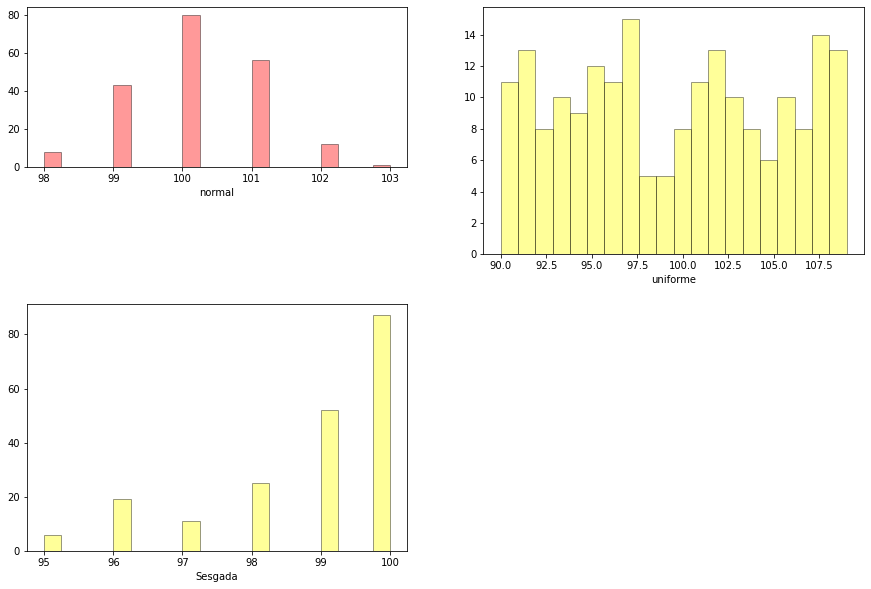

In [3]:
# CONTROLAMOS GRAFICAMENTE LAS MATRICES OBTENIDAS


import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,10))
plt.subplot(3, 2, 1)

sns.distplot(matriz2['normal'], hist=True, kde=False, 
             bins=int(20), color = 'red',
             hist_kws={'edgecolor':'black'})

plt.subplot(2, 2, 2)

sns.distplot(matriz2['uniforme'], hist=True, kde=False, 
             bins=int(20), color = 'yellow',
             hist_kws={'edgecolor':'black'})

plt.subplot(2, 2, 3)


sns.distplot(matriz2['Sesgada'], hist=True, kde=False, 
             bins=int(20), color = 'yellow',
             hist_kws={'edgecolor':'black'})


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


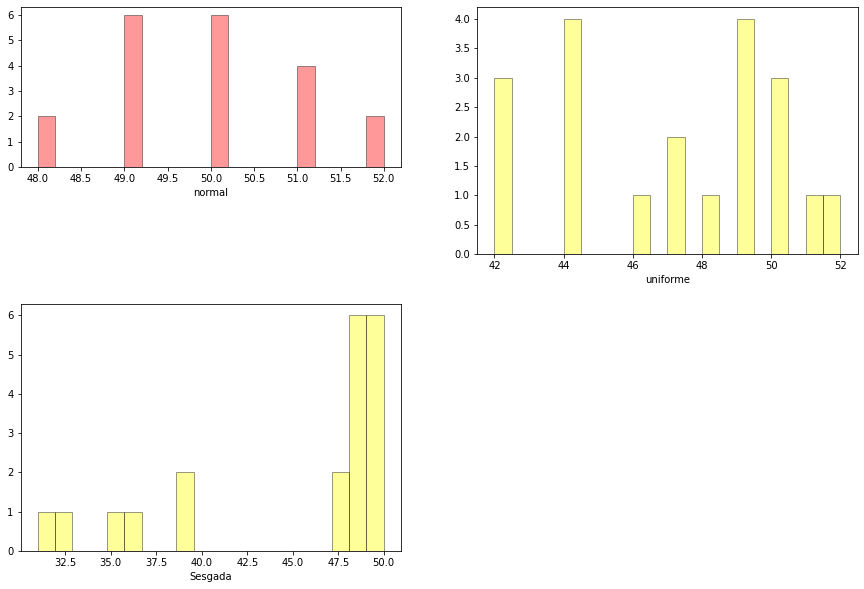

In [4]:
plt.figure(figsize=(15,10))
plt.subplot(3, 2, 1)

sns.distplot(matriz1['normal'], hist=True, kde=False, 
             bins=int(20), color = 'red',
             hist_kws={'edgecolor':'black'})

plt.subplot(2, 2, 2)

sns.distplot(matriz1['uniforme'], hist=True, kde=False, 
             bins=int(20), color = 'yellow',
             hist_kws={'edgecolor':'black'})

plt.subplot(2, 2, 3)


sns.distplot(matriz1['Sesgada'], hist=True, kde=False, 
             bins=int(20), color = 'yellow',
             hist_kws={'edgecolor':'black'})




In [5]:
# SIMULAMOS LOS PASOS DE EL ANALISIS EXPLORATORIO DE DATOS
# SIMULAMOS YA QUE ESTAMOS PARTIENDO DE UNA MATRIZ GENERADA POR NOSOTROS

print("FORMATO DE LA MATRIZ 1"+str(matriz1.shape))
print("FORMATO DE LA MATRIZ 2"+str(matriz2.shape))
print("-"*5)
print("Head de la MATRIZ 1")
print(matriz1.head())
print("Head de la MATRIZ 2")
print(matriz2.head())

print("-"*5)
print("Columnas de la MATRIZ 1")
print(matriz1.columns)
print("Columnas de la MATRIZ 2")
print(matriz2.columns)

print("-"*5)
print("Info MATRIZ 1")
print(matriz1.info())
print("Info MATRIZ 2")
print(matriz2.info())







FORMATO DE LA MATRIZ 1(20, 3)
FORMATO DE LA MATRIZ 2(200, 3)
-----
Head de la MATRIZ 1
   normal  uniforme  Sesgada
0    52.0        44     39.0
1    49.0        47     49.0
2    49.0        46     49.0
3    49.0        48     49.0
4    51.0        44     39.0
Head de la MATRIZ 2
   normal  uniforme  Sesgada
0    99.0       102     99.0
1   101.0       107     96.0
2   101.0        91     97.0
3   101.0       100     99.0
4   101.0        99     96.0
-----
Columnas de la MATRIZ 1
Index(['normal', 'uniforme', 'Sesgada'], dtype='object')
Columnas de la MATRIZ 2
Index(['normal', 'uniforme', 'Sesgada'], dtype='object')
-----
Info MATRIZ 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   normal    20 non-null     float64
 1   uniforme  20 non-null     int64  
 2   Sesgada   20 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 608.0 bytes
None


In [7]:
  # CONTROLAMOS EXISTENCIA DE VALORES NULOS
  ac=0
  for i in matriz1:
    ac=matriz1[i].isnull().sum()+ac
  print("Valores nulos en matriz1 \n"+ str(ac))
    
  ac=0
  for i in matriz2:
    ac=matriz2[i].isnull().sum()+ac
  print("Valores nulos en matriz2 \n"+ str(ac))

Valores nulos en matriz1 
0
Valores nulos en matriz2 
0


In [8]:
# CONTROLAMOS LA "descripcion" DE LAS MATRICES , COMO ESTAN CONFORMADAS

print(round(matriz1.describe()),2)

print(round(matriz2.describe()),2)

       normal  uniforme  Sesgada
count    20.0      20.0     20.0
mean     50.0      47.0     45.0
std       1.0       3.0      7.0
min      48.0      42.0     31.0
25%      49.0      44.0     39.0
50%      50.0      48.0     49.0
75%      51.0      49.0     50.0
max      52.0      52.0     50.0 2
       normal  uniforme  Sesgada
count   200.0     200.0    200.0
mean    100.0      99.0     99.0
std       1.0       6.0      1.0
min      98.0      90.0     95.0
25%      99.0      94.0     98.0
50%     100.0     100.0     99.0
75%     101.0     105.0    100.0
max     103.0     109.0    100.0 2


Text(0, 0.5, 'Sesgada')

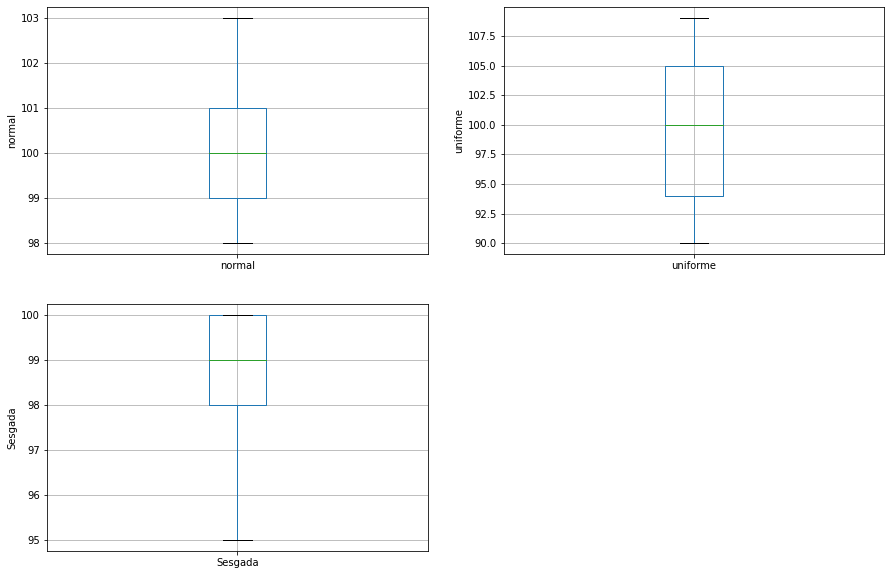

In [9]:
# ANALIZAMOS GRAFICAMENTE LA DISPERCION DE DATOS

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = matriz2.boxplot(column='normal')
fig.set_title('')
fig.set_ylabel('normal')




plt.subplot(2, 2, 2)
fig = matriz2.boxplot(column='uniforme')
fig.set_title('')
fig.set_ylabel('uniforme')


plt.subplot(2, 2, 3)
fig = matriz2.boxplot(column='Sesgada')
fig.set_title('')
fig.set_ylabel('Sesgada')

Text(0, 0.5, 'Sesgada')

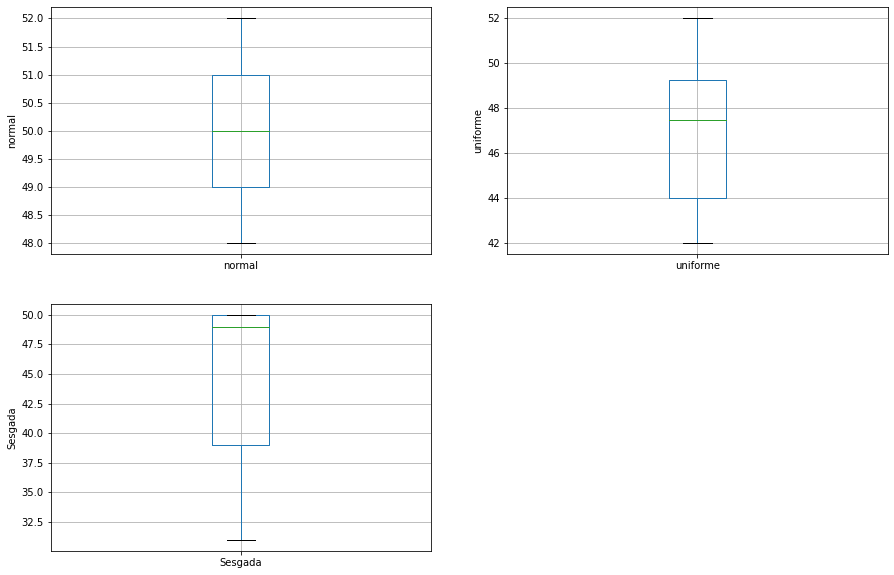

In [10]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = matriz1.boxplot(column='normal')
fig.set_title('')
fig.set_ylabel('normal')




plt.subplot(2, 2, 2)
fig = matriz1.boxplot(column='uniforme')
fig.set_title('')
fig.set_ylabel('uniforme')


plt.subplot(2, 2, 3)
fig = matriz1.boxplot(column='Sesgada')
fig.set_title('')
fig.set_ylabel('Sesgada')

Text(0, 0.5, 'Sesgada')

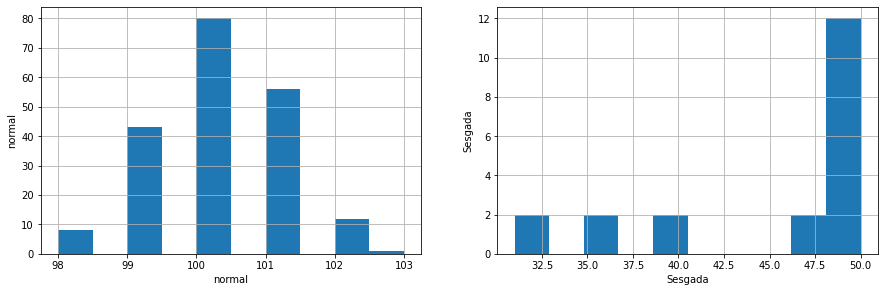

In [11]:
# DISTRIBUCION DE LOS OUTLIERS

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = matriz2.normal.hist(bins=10)
fig.set_xlabel('normal')
fig.set_ylabel('normal')

plt.subplot(2, 2, 2)
fig = matriz1.Sesgada.hist(bins=10)
fig.set_xlabel('Sesgada')
fig.set_ylabel('Sesgada')



In [12]:
#EVALUAMOS MATEMATICAMENTE LOS LIMITES DE LOS OUTLIERS

q3=matriz1.Sesgada.quantile(0.75)
q1=matriz1.Sesgada.quantile(0.25)
IQR =  q3-q1
print(q3)
print(q1)
print(IQR)
Lower_fence = matriz1.Sesgada.quantile(0.25) - (IQR * 3)
Upper_fence = matriz1.Sesgada.quantile(0.75) + (IQR * 3)
print('Sesgada - de matriz1 outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

50.0
39.0
11.0
Sesgada - de matriz1 outliers are values < 6.0 or > 83.0


In [13]:

# CONVIERTO LOS OBJETOS NP EN DATAFRAME Y LOS TRASPONGO, LUEGO LOS CONCATENO PARA ARMAR UNA SOLA MATRIZ 

label_M1=pd.DataFrame(label_M1).T
label_M2=pd.DataFrame(label_M2).T

x_label = pd.concat([matriz1,matriz2])
y_label = pd.concat([label_M1,label_M2])

print(x_label.shape)

print(y_label.shape)

(220, 3)
(220, 1)


In [14]:
# REALIZO LA DIVISION DE ELEMENTOS DE ENTRENAMIENTO Y DE PRUEBA

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_label, y_label, test_size = 0.2, random_state = 0)

In [15]:
# ANALIZAMOS LA DISTRIBUCION DE LOS ELEMENTOS x_label donde se mezclan validos e invalidos (1 y 0)
c_va=X_train[X_train['normal']>70].count()
c_inva=X_train[X_train['normal']<70].count()

print("Cantidad de valores de la matriz1: "+str(c_va)+"\n Cantidad de valores de la matriz2"+str(c_inva) )
print("porcentage entre matrices:" + str(c_va/c_inva))

Cantidad de valores de la matriz1: normal      162
uniforme    162
Sesgada     162
dtype: int64
 Cantidad de valores de la matriz2normal      14
uniforme    14
Sesgada     14
dtype: int64
porcentage entre matrices:normal      11.571429
uniforme    11.571429
Sesgada     11.571429
dtype: float64


In [16]:
# PONGO EN ESCALA LOS VALORES DE LAS MATRICES DE DATOS
cols = X_train.columns


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [17]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,normal,uniforme,Sesgada
count,176.000000,176.000000,176.000000
mean,0.875000,0.792486,0.919219
std,0.247125,0.228368,0.221385
min,0.000000,0.000000,0.000000
25%,0.927273,0.761194,0.971014
50%,0.945455,0.828358,0.985507
75%,0.963636,0.925373,1.000000
max,1.000000,1.000000,1.000000


In [18]:


# IMPORTAMOS EL METODO LOGISTICREGRESSION
from sklearn.linear_model import LogisticRegression


# INSTANCIAMOS EL MODELO CON LA MAYORIA DE LOS PARAMETROS POR DEFECTO
logreg = LogisticRegression(solver='liblinear', random_state=0)


# ENTRENAMOS EL MODELO
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [19]:
#REALIZAMOS UNA PREDICCION
y_pred_test = logreg.predict(X_test)

y_pred_test

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
#EVALAMOS LA PROBABILIDAD DE QUE EL RESULTADO SEA 1
logreg.predict_proba(X_test)[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([0.89423657, 0.89609713, 0.89682185, 0.8971027 , 0.897643  ,
       0.89594545, 0.89708323, 0.89621197, 0.89567196, 0.8975227 ,
       0.8953711 , 0.86531523, 0.89538387, 0.8960769 , 0.89696236,
       0.89623851, 0.89452684, 0.89567196, 0.8943834 , 0.8967007 ,
       0.89351915, 0.86614928, 0.89623851, 0.89538766, 0.89708323,
       0.89609713, 0.89394882, 0.89566818, 0.86561994, 0.86473378,
       0.89778251, 0.86422447, 0.89736345, 0.86546766, 0.89712216,
       0.89597523, 0.89622841, 0.89707321, 0.89480358, 0.89666163,
       0.89495292, 0.89597523, 0.89707321, 0.89778251])

In [21]:
# INICIAMOS LOS ANALISIS DE METRICAS

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9318


In [22]:
y_pred_train = logreg.predict(X_train)

y_pred_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [23]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# SI BIEN VEMOS QUE TIENE UN ACCURACY MUY ALTO VAMOS A COMPROBAR LUEGO CON LA MATRIZ DE CONFUSION QUE EL SISTEMA NO ESTA FUNCIONANDO CORRECTAMENTE

Training-set accuracy score: 0.9034


In [24]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9034
Test set score: 0.9318


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [25]:
# REPITE EXPERIMENTO CAMBIANDO EL VALOR DE C

# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100, random_state=0, solver='liblinear')

In [26]:

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.9034
Test set score: 0.9318


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [27]:
# REPITE EXPERIMENTO CAMBIANDO EL VALOR DE C

# fit the Logsitic Regression model with C=100

# instantiate the model
logreg001 = LogisticRegression(C=0.001, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.001, random_state=0, solver='liblinear')

In [28]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.9034
Test set score: 0.9318


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [29]:
null_accuracy=y_test.value_counts()[1]/(y_test.value_counts()[1]+y_test.value_counts()[0])

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9318


In [30]:
# MATRIZ DE CONFUSION

# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 0  3]
 [ 0 41]]

True Positives(TP) =  0

True Negatives(TN) =  41

False Positives(FP) =  3

False Negatives(FN) =  0


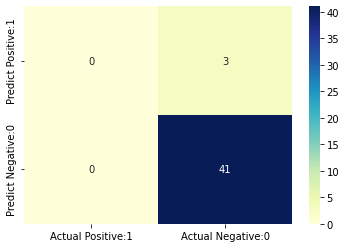

In [31]:
# COMO SE PUEDE VER EL 100% DE LOS CASOS DE PRUEBA NEGATIVOS DIERON FALSO POSITIVO, POR LO CUAL EL MODELO NO ESTA DETECTANDO CORRECTAMENTE LOS DATOS
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.93      1.00      0.96        41

    accuracy                           0.93        44
   macro avg       0.47      0.50      0.48        44
weighted avg       0.87      0.93      0.90        44



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [34]:

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9318


In [35]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0682
